In [1]:
import matplotlib.pyplot as plt
import ds_functions as ds
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import config as cfg

register_matplotlib_converters()

# Heart Failure Dataset

In [2]:
data = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

## Dimensionality

In [3]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


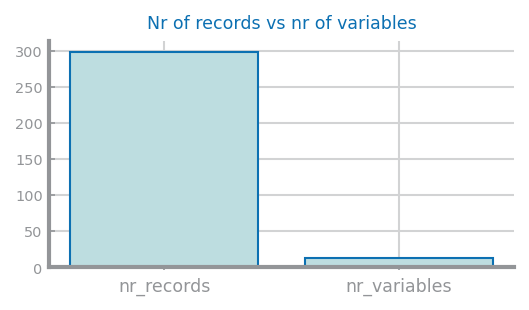

In [4]:
plt.figure(figsize=(4,2))
values = { 'nr_records': data.shape[0], 'nr_variables': data.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs nr of variables')

In [5]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [6]:
data['sex'] = data['sex'].astype('category')
for c in ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']:
    data[c] = data[c].astype('bool')

data.dtypes

age                          float64
anaemia                         bool
creatinine_phosphokinase       int64
diabetes                        bool
ejection_fraction              int64
high_blood_pressure             bool
platelets                    float64
serum_creatinine             float64
serum_sodium                   int64
sex                         category
smoking                         bool
time                           int64
DEATH_EVENT                     bool
dtype: object

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<Figure size 600x450 with 0 Axes>

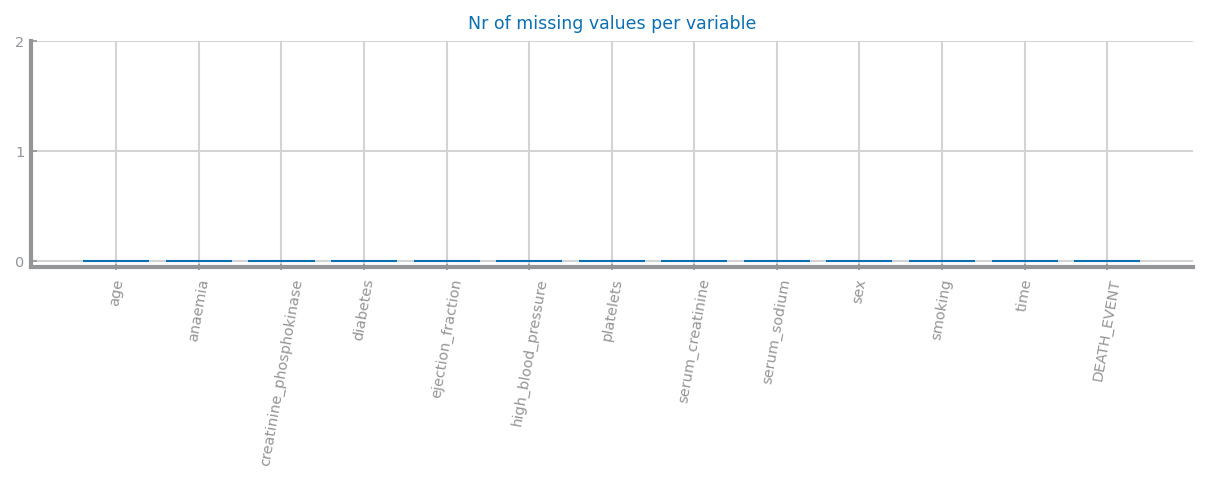

In [7]:
plt.figure()
mv = {var: data[var].isna().sum() for var in data}
plt.figure(figsize=(10, 2))
plt.bar(mv.keys(), mv.values(), edgecolor=cfg.LINE_COLOR, color=cfg.FILL_COLOR)
plt.title('Nr of missing values per variable')
plt.yticks([0, 1, 2])
plt.xticks(rotation=80)

mv.values()

## Granularity

## Distribution

# Toxicity Dataset

In [8]:
data = pd.read_csv('data/qsar_oral_toxicity.csv', sep=';', header=None)

## Dimensionality

In [9]:
data

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8987,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,negative
8988,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,negative
8989,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,negative
8990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


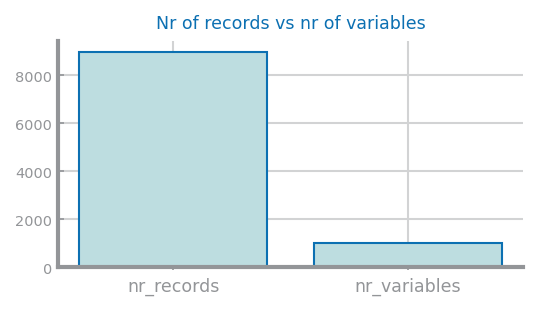

In [10]:
plt.figure(figsize=(4,2))
values = { 'nr_records': data.shape[0], 'nr_variables': data.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs nr of variables')

In [11]:
data.dtypes

0        int64
1        int64
2        int64
3        int64
4        int64
         ...  
1020     int64
1021     int64
1022     int64
1023     int64
1024    object
Length: 1025, dtype: object

In [12]:
## Should we?
for c in data.columns:
    data[c] = data[c].astype('bool')
data.rename(columns={1024: 'toxic'}, inplace=True)
data.dtypes

0        bool
1        bool
2        bool
3        bool
4        bool
         ... 
1020     bool
1021     bool
1022     bool
1023     bool
toxic    bool
Length: 1025, dtype: object

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

<Figure size 600x450 with 0 Axes>

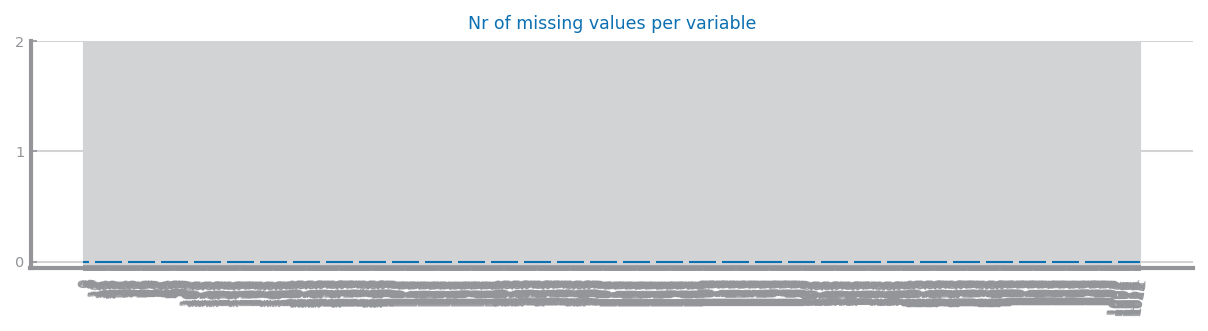

In [16]:
plt.figure()
mv = {str(var): data[var].isna().sum() for var in data}
plt.figure(figsize=(10, 2))
plt.bar(mv.keys(), mv.values(), edgecolor=cfg.LINE_COLOR, color=cfg.FILL_COLOR)
plt.title('Nr of missing values per variable')
plt.yticks([0, 1, 2])
plt.xticks(rotation=80)

## Granularity

## Distribution